<a href="https://colab.research.google.com/github/sunil19203030/COVID19/blob/master/Tumorvgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive') # driver mounted through local computer storage

Mounted at /content/drive


In [6]:
#Data imort numpy and pandas
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../content/drive/MyDrive/BRAIN'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
../content/drive/MyDrive/BRAIN/no/no 1 (709).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (712).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (701).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (708).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (717).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (711).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (707).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (706).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (705).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (715).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (731).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (724).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (728).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (729).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (727).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (720).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (719).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (730).jpg
../content/drive/MyDrive/BRAIN/no/no 1 (725).jpg
../content/drive/M

In [7]:
#%% Starting importing  data 
import os
import glob
import shutil
import random
import pandas as pd
from PIL import Image
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Verifying the Path and label in file
def importing_data(path):
    sample = []
    for filename in glob.glob(path):
       #img = Image.open(filename,'r')
        #IMG = np.array(img)
        sample.append(filename)
    return sample
path1 = '/content/drive/MyDrive/BRAIN/no/*.jpg'
path2 = '/content/drive/MyDrive/BRAIN/yes/*.jpg'
path3 = '/content/drive/MyDrive/BRAIN/pred/*.jpg'

train_n = importing_data(path1)
train_y = importing_data(path2)
test = importing_data(path3)
#  DATASETS CREATE

df_train_n = pd.DataFrame({'image':train_n, 'label': 'Healthy'})
df_train_y = pd.DataFrame({'image':train_y, 'label': 'Affected'})
df_test = pd.DataFrame({'image':test})
train_data = pd.concat([df_train_n, df_train_y])
train_data.head()

image    label
0  /content/drive/MyDrive/BRAIN/no/no 1 (1205).jpg  Healthy
1  /content/drive/MyDrive/BRAIN/no/no 1 (1203).jpg  Healthy
2  /content/drive/MyDrive/BRAIN/no/no 1 (1198).jpg  Healthy
3  /content/drive/MyDrive/BRAIN/no/no 1 (1206).jpg  Healthy
4  /content/drive/MyDrive/BRAIN/no/no 1 (1210).jpg  Healthy

In [10]:
# Automatic-TEST SPLIT METhod Brain Dataset(90% Training - 10% TEST)

from sklearn.model_selection import train_test_split

X_train, X_val = train_test_split(train_data,
                                  test_size = 0.1,
                                  shuffle = True,
                                  random_state = 42)

In [12]:
# CNN MODEL CREATE
import keras
from keras.metrics import AUC, Recall, Precision
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Conv2D , MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import RMSprop

def build_model():
    
    '''Sequential Model creation'''
    Cnn = Sequential()
    
    Cnn.add(Conv2D(32,(5,5), activation ='relu', padding = 'same', strides=(2,2),
            input_shape = [224,224,1])) #extra
    Cnn.add(MaxPooling2D(2))
    Cnn.add(Conv2D(64,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(Conv2D(128,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(Conv2D(128,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(Conv2D(256,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
    Cnn.add(Conv2D(256,(5,5), activation = 'relu', padding = 'same', strides=(2,2)))
   #MaxPool2D(pool_size=(2,2)),
    Cnn.add(MaxPooling2D(2))
    #Cnn.add(GlobalAveragePooling2D())
    Cnn.add(Flatten())
    Cnn.add(Dense(64, activation = 'relu'))
    Cnn.add(Dropout(0.4))
    Cnn.add(Dense(32, activation = 'relu'))
    Cnn.add(Dropout(0.4))
    
    
    
    Cnn.add(Dense(2, activation = 'softmax'))
    
    return Cnn

keras_model = build_model()
keras_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 112, 112, 32)      832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 128)       204928    
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 128)         409728    
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 256)         819456    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 256)        

In [13]:
# MODEL TRAIN

def Model_fit(train_data, val_data):
    
    keras_model = None
    
    keras_model = build_model()
    
    '''Compiling the model'''
    
    keras_model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                        loss='sparse_categorical_crossentropy',
                        metrics =['acc'])
    
    es = EarlyStopping(monitor='val_loss', mode='min',
                       patience=2,
                       restore_best_weights=True,
                       verbose=1)
                       
    
    checkpoint_cb = ModelCheckpoint("Brain_model_best.h5",
                                    save_best_only=True)
    
    reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                  factor = 0.2,
                                  patience = 3,
                                  min_lr = 1e-5,
                                  mode = 'min',
                                  verbose=1)
                                  
    
    history = keras_model.fit(train_data,
                              validation_data = val_data,
                              epochs= 50,
                              batch_size = 10,
                              callbacks=[es, checkpoint_cb, reduce_lr])
                              
    
      
    return history

In [15]:
#Data Augmentation


from keras.preprocessing.image import ImageDataGenerator
 
k_fold = 3
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
n_CLASS = 2
 
def CV_training(train_data, val_data):
    
    cv_histories = []
    
    for i in range(0,k_fold):
    
        datagen = ImageDataGenerator(rescale = 1./255)
    
        train_set = datagen.flow_from_dataframe(train_data,
                                                directory = '//content/drive/MyDrive/BRAIN/*.jpg',
                                                x_col = 'image',
                                                y_col = 'label',
                                                target_size = size,
                                                color_mode = 'grayscale',
                                                class_mode = 'sparse',
                                                batch_size = 15,
                                                shuffle = True,
                                                interpolation = 'bilinear')
        
        val_set = datagen.flow_from_dataframe(val_data,
                                              directory = '//content/drive/MyDrive/BRAIN/*.jpg',
                                              x_col = 'image',
                                              y_col = 'label',
                                              target_size = size,
                                              color_mode = 'grayscale',
                                              class_mode = 'sparse',
                                              batch_size = 15,
                                              shuffle = True,
                                              interpolation = 'bilinear')
        print("Training on Fold: ",i+1)
    
        cv_histories.append(Model_fit(train_set, val_set))
    
    return cv_histories
 

 
cv_results = CV_training(X_train,X_val)

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 5488 validated image filenames belonging to 2 classes.
Found 610 validated image filenames belonging to 2 classes.
Training on Fold:  1
Epoch 1/50
366/366 [==============================] - 32s 85ms/step - loss: 0.6299 - acc: 0.6790 - val_loss: 0.5402 - val_acc: 0.7639
Epoch 2/50
366/366 [==============================] - 31s 84ms/step - loss: 0.4114 - acc: 0.8407 - val_loss: 0.2674 - val_acc: 0.9213
Epoch 3/50
366/366 [==============================] - 31s 85ms/step - loss: 0.2626 - acc: 0.9129 - val_loss: 0.2021 - val_acc: 0.9230
Epoch 4/50
366/366 [==============================] - 31s 84ms/step - loss: 0.1661 - acc: 0.9419 - val_loss: 0.1355 - val_acc: 0.9492
Epoch 5/50
366/366 [==============================] - 31s 84ms/step - loss: 0.1107 - acc: 0.9642 - val_loss: 0.1532 - val_acc: 0.9557
Epoch 6/50
366/366 [==============================] - 31s 84ms/step - loss: 0.0703 - acc: 0.9782 - val_loss: 0.1076 - val_acc: 0.9787
Epoch 7/50
366/366 [==============================] - 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 5488 validated image filenames belonging to 2 classes.
Found 610 validated image filenames belonging to 2 classes.
Training on Fold:  2
Epoch 1/50
366/366 [==============================] - 32s 85ms/step - loss: 0.6364 - acc: 0.6575 - val_loss: 0.5439 - val_acc: 0.7311
Epoch 2/50
366/366 [==============================] - 31s 84ms/step - loss: 0.4976 - acc: 0.7892 - val_loss: 0.3639 - val_acc: 0.8590
Epoch 3/50
366/366 [==============================] - 31s 84ms/step - loss: 0.3346 - acc: 0.8785 - val_loss: 0.2545 - val_acc: 0.8820
Epoch 4/50
366/366 [==============================] - 31s 84ms/step - loss: 0.2350 - acc: 0.9208 - val_loss: 0.1641 - val_acc: 0.9393
Epoch 5/50
366/366 [==============================] - 31s 85ms/step - loss: 0.1476 - acc: 0.9530 - val_loss: 0.1421 - val_acc: 0.9393
Epoch 6/50
366/366 [==============================] - 31s 85ms/step - loss: 0.1098 - acc: 0.9650 - val_loss: 0.1406 - val_acc: 0.9574
Epoch 7/50
366/366 [==============================] - 

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


Found 5488 validated image filenames belonging to 2 classes.
Found 610 validated image filenames belonging to 2 classes.
Training on Fold:  3
Epoch 1/50
366/366 [==============================] - 33s 87ms/step - loss: 0.6404 - acc: 0.6501 - val_loss: 0.5196 - val_acc: 0.7967
Epoch 2/50
366/366 [==============================] - 32s 87ms/step - loss: 0.4774 - acc: 0.8030 - val_loss: 0.3269 - val_acc: 0.8770
Epoch 3/50
366/366 [==============================] - 31s 84ms/step - loss: 0.3235 - acc: 0.8824 - val_loss: 0.2688 - val_acc: 0.8852
Epoch 4/50
366/366 [==============================] - 31s 84ms/step - loss: 0.2287 - acc: 0.9268 - val_loss: 0.1772 - val_acc: 0.9361
Epoch 5/50
366/366 [==============================] - 31s 84ms/step - loss: 0.1459 - acc: 0.9574 - val_loss: 0.1457 - val_acc: 0.9525
Epoch 6/50
366/366 [==============================] - 31s 84ms/step - loss: 0.1041 - acc: 0.9726 - val_loss: 0.1102 - val_acc: 0.9623
Epoch 7/50
366/366 [==============================] - 

In [16]:
#%% Result Accuracy in Dataset  

def acc_results(results):
    i = 0
    for fold in cv_results:
        print('Val_Acc Folder '+ str(i) + ' =', max(fold.history['val_acc']))
        i += 1
        
acc_results(cv_results)

Val_Acc Folder 0 = 0.9786885380744934
Val_Acc Folder 1 = 0.9688524603843689
Val_Acc Folder 2 = 0.965573787689209


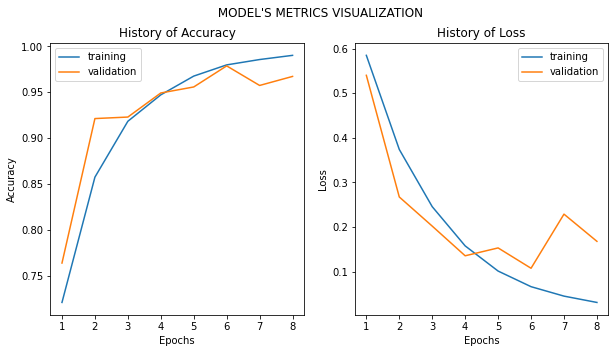

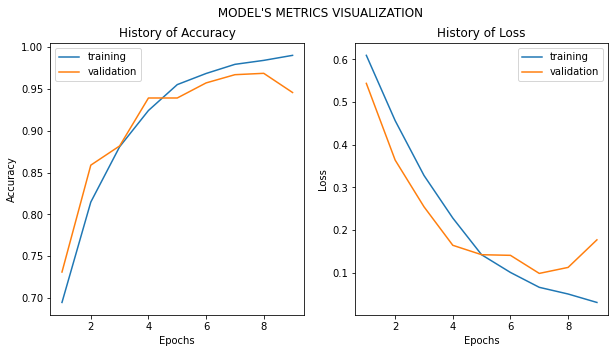

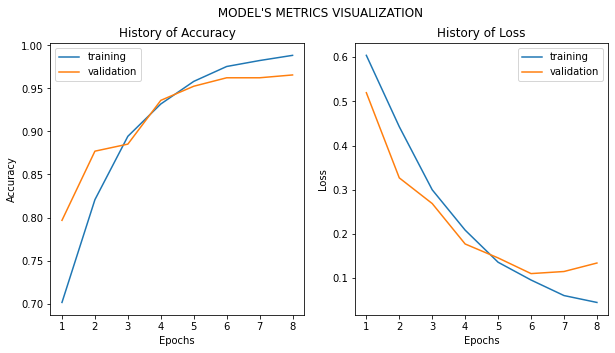

In [17]:
#%% IPlotting Accuracy Image

def Acc_Loss_Plot(results):
    
    for fold in results:
        
        acc = fold.history['acc']
        val_acc = fold.history['val_acc']
        loss = fold.history['loss']
        val_loss = fold.history['val_loss']
    
        fig, (ax1, ax2) = plt.subplots(1,2, figsize= (10,5))
        fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

        ax1.plot(range(1, len(acc) + 1), acc)
        ax1.plot(range(1, len(val_acc) + 1), val_acc)
        ax1.set_title('History of Accuracy')
        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        ax1.legend(['training', 'validation'])


        ax2.plot(range(1, len(loss) + 1), loss)
        ax2.plot(range(1, len(val_loss) + 1), val_loss)
        ax2.set_title('History of Loss')
        ax2.set_xlabel('Epochs')
        ax2.set_ylabel('Loss')
        ax2.legend(['training', 'validation'])
        plt.show()
    
Acc_Loss_Plot(cv_results)

In [22]:
#%% create healthy and effected Prediction  

import keras

keras_model = keras.models.load_model('Brain_model_best.h5')
keras_model.compile(optimizer = RMSprop(learning_rate = 1e-4),
                    loss='sparse_categorical_crossentropy', metrics =[ 'acc'])

# Predictions on the test set

datagen = ImageDataGenerator(rescale = 1./255)

test_set = datagen.flow_from_dataframe(df_test,
                                       directory = '//content/drive/MyDrive/BRAIN/*.jpg',
                                       x_col = 'image',
                                       y_col = None,
                                       target_size = size,
                                       color_mode = 'grayscale',
                                       class_mode = None,
                                       batch_size = 130,
                                       shuffle = False,
                                       interpolation = 'bilinear')

predictions = keras_model.predict(test_set)
predictions = predictions.argmax(axis=-1)
print("Where 0 = 'Affected'")
print("Where 1 = 'Healthy'")
print(predictions)

Found 107 validated image filenames.
Where 0 = 'Affected'
Where 1 = 'Healthy'
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1]


In [23]:
pred = []
[pred.append('Healthy') if i == 1 else pred.append('Affected') for i in predictions]
print(pred)

['Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Affected', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy', 'Healthy

In [25]:
#%% MODELİN Particular Brain Image
    
images107 = [test_set[0][0],test_set[0][1],test_set[0][2],test_set[0][3],test_set[0][4],
            test_set[0][5],test_set[0][6],test_set[0][7],test_set[0][8],test_set[0][9],test_set[0][10],test_set[0][11],test_set[0][12],test_set[0][13],test_set[0][14],test_set[0][15],test_set[0][16],test_set[0][17],test_set[0][18],test_set[0][19],test_set[0][20],test_set[0][21],test_set[0][22],test_set[0][23],test_set[0][24],test_set[0][25],test_set[0][26],test_set[0][27],test_set[0][28],test_set[0][29],test_set[0][30],test_set[0][31],test_set[0][32],test_set[0][33],test_set[0][34],test_set[0][35],test_set[0][36],test_set[0][38],test_set[0][39],test_set[0][40],test_set[0][41],test_set[0][42],test_set[0][43],test_set[0][44],test_set[0][45],test_set[0][46],test_set[0][47],test_set[0][48],test_set[0][49],test_set[0][50],test_set[0][51],test_set[0][52],test_set[0][53],test_set[0][54],test_set[0][55],test_set[0][56],test_set[0][58],test_set[0][59],test_set[0][60],test_set[0][61],test_set[0][62],test_set[0][63],test_set[0][64],test_set[0][65],test_set[0][66],test_set[0][67],test_set[0][68],test_set[0][69],test_set[0][70],test_set[0][71],test_set[0][72],test_set[0][73],test_set[0][74],test_set[0][75],test_set[0][76],test_set[0][77],test_set[0][78],test_set[0][79],test_set[0][80],test_set[0][81],test_set[0][82],test_set[0][83],test_set[0][84],test_set[0][85],test_set[0][86],test_set[0][87],test_set[0][88],test_set[0][89],test_set[0][90],test_set[0][91],test_set[0][92],test_set[0][93],test_set[0][94],test_set[0][95],test_set[0][96],test_set[0][97],test_set[0][98],test_set[0][99],test_set[0][100],test_set[0][101],test_set[0][102],test_set[0][103],test_set[0][104],test_set[0][105],test_set[0][106]]#,test_set[0][107],test_set[0][108],test_set[0][109],test_set[0][110],test_set[0][111],test_set[0][112],test_set[0][113],test_set[0][114],test_set[0][115],test_set[0][116],test_set[0][117],test_set[0][118],test_set[0][119],test_set[0][120],test_set[0][121],test_set[0][122],test_set[0][123],test_set[0][124],test_set[0][125]]
prediction107 = pred[0:106]
final_pred = zip(images107,prediction107)

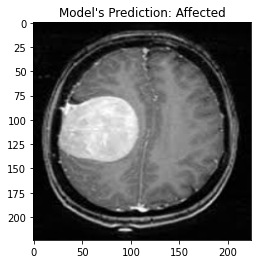

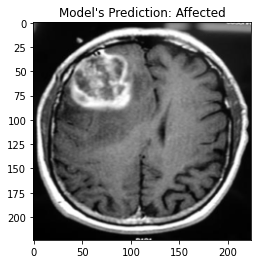

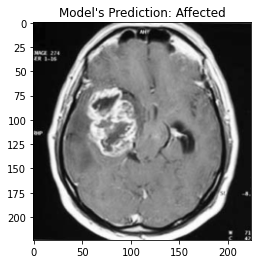

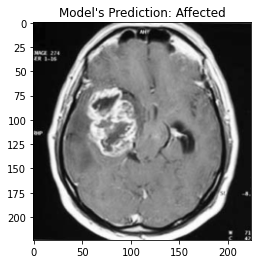

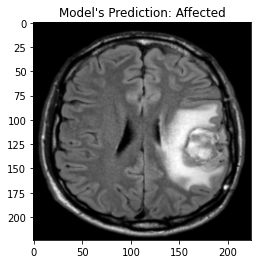

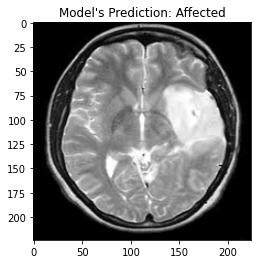

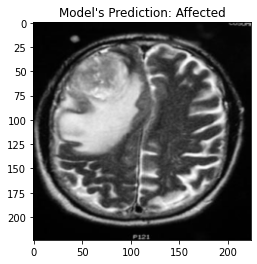

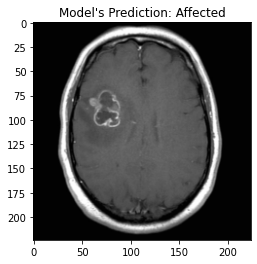

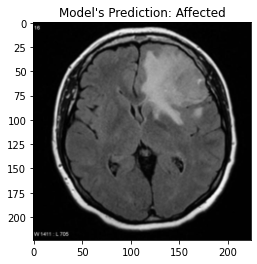

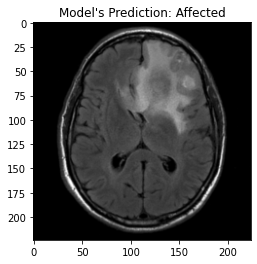

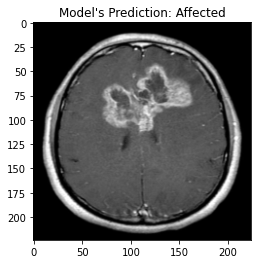

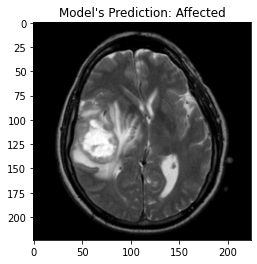

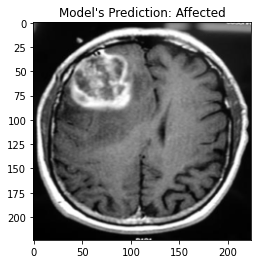

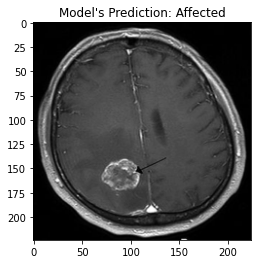

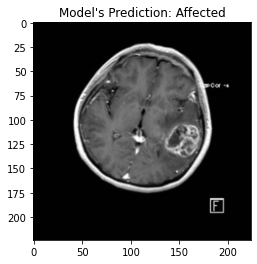

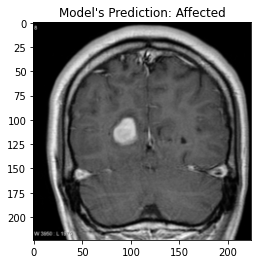

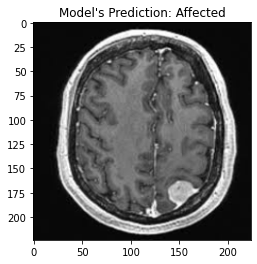

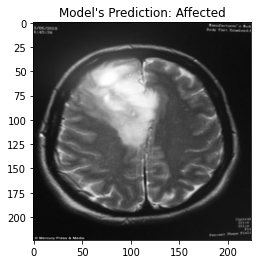

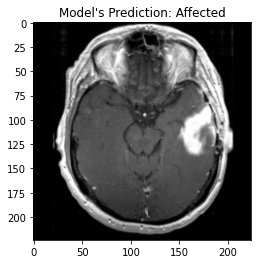

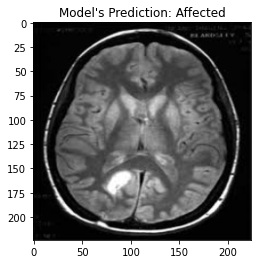

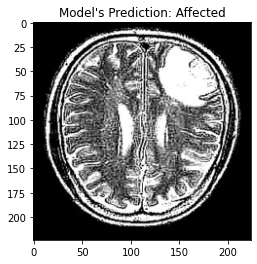

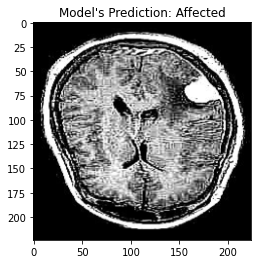

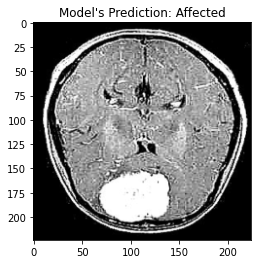

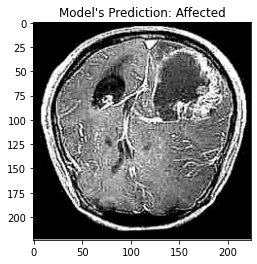

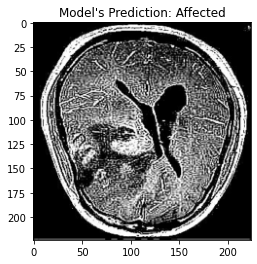

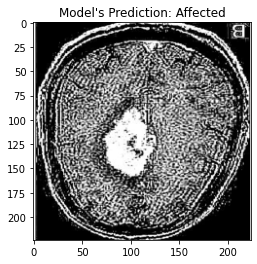

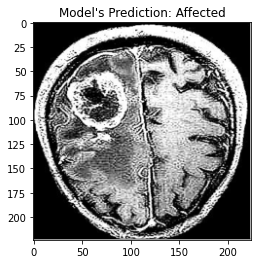

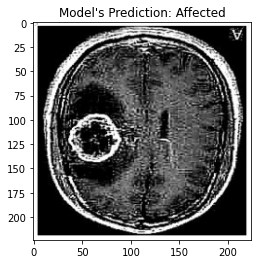

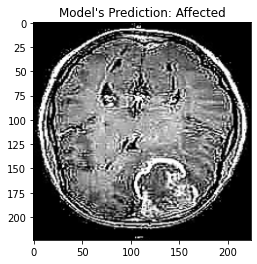

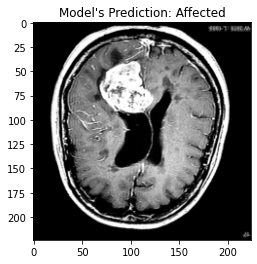

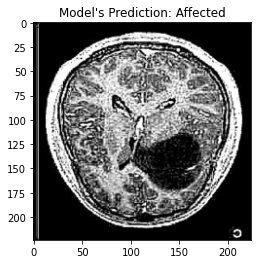

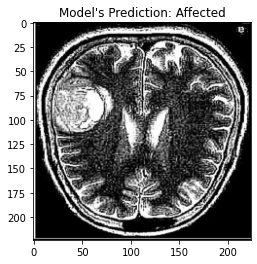

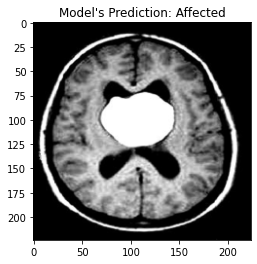

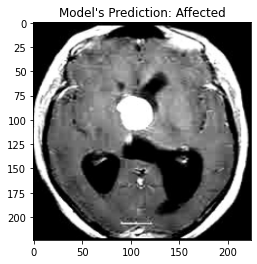

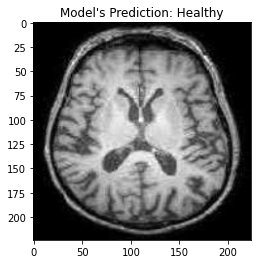

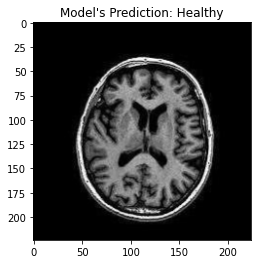

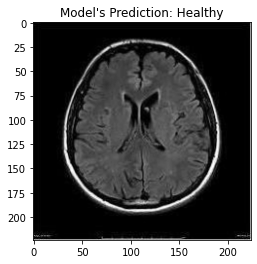

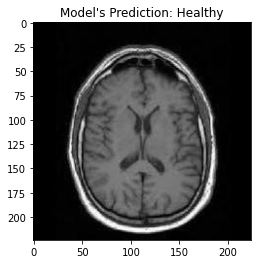

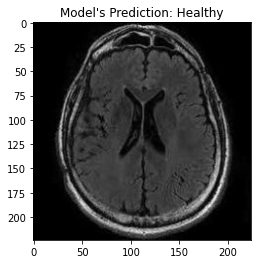

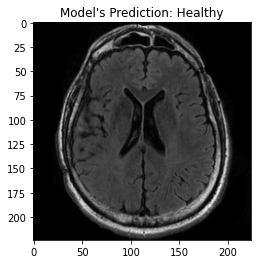

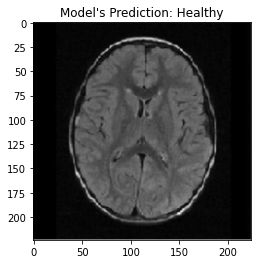

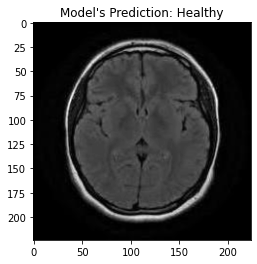

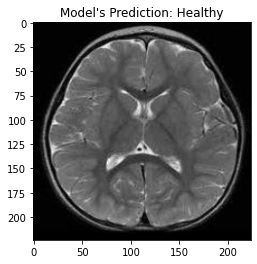

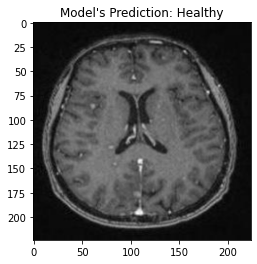

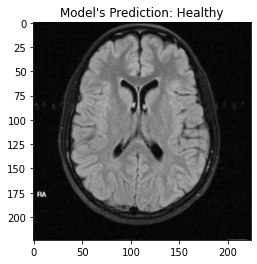

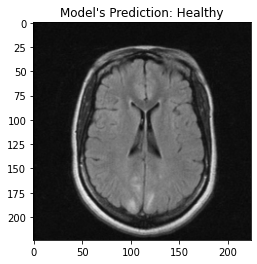

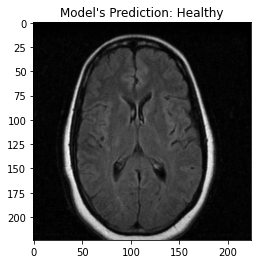

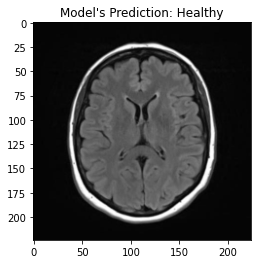

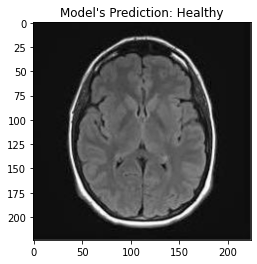

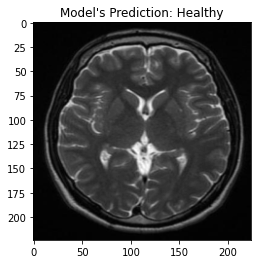

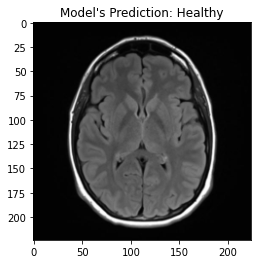

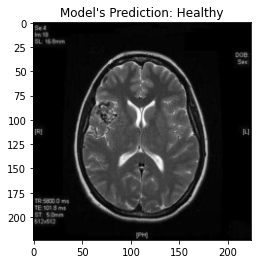

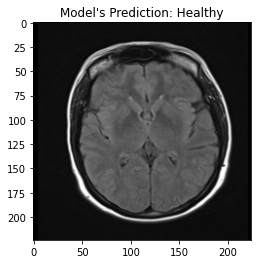

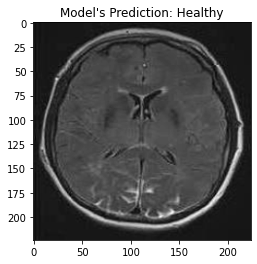

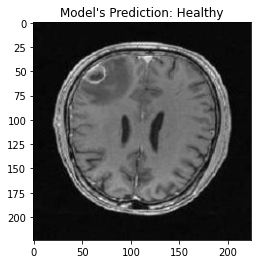

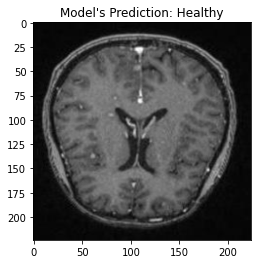

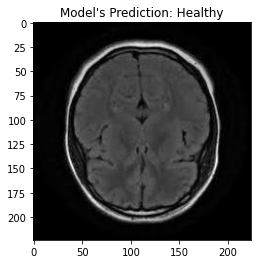

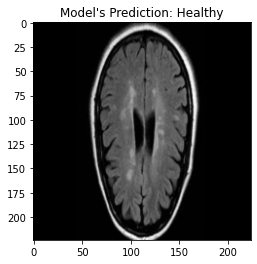

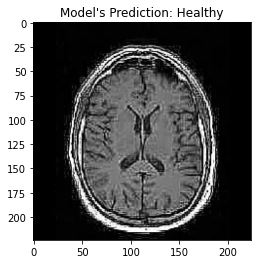

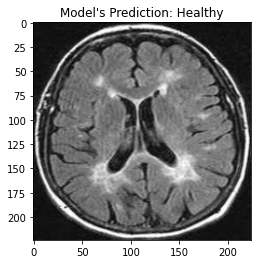

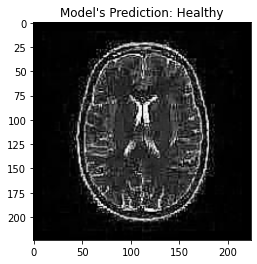

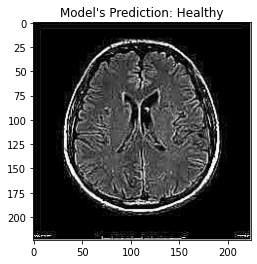

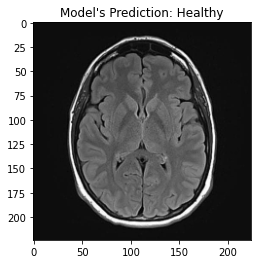

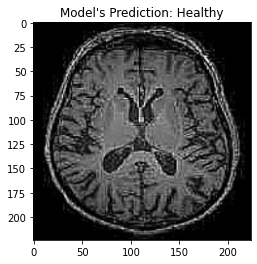

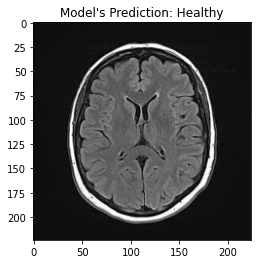

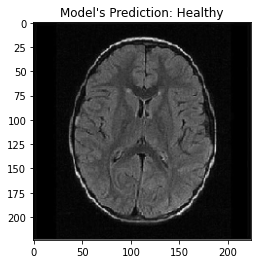

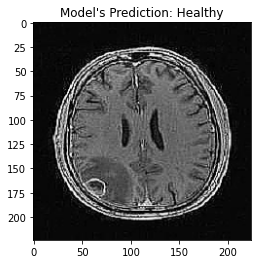

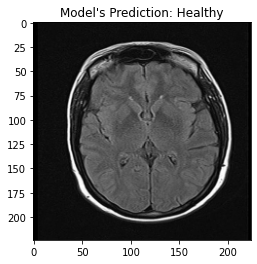

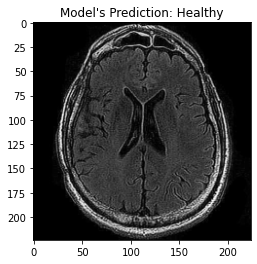

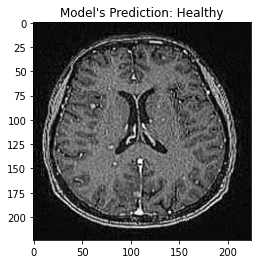

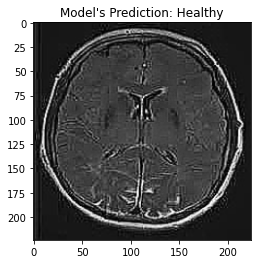

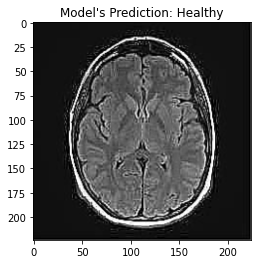

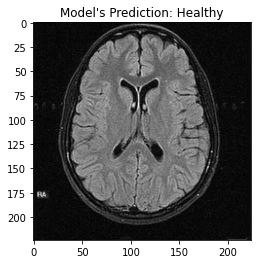

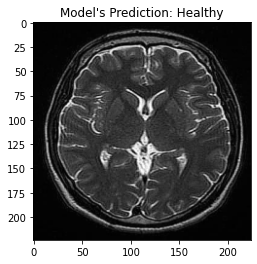

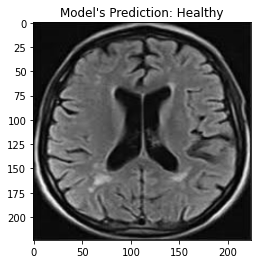

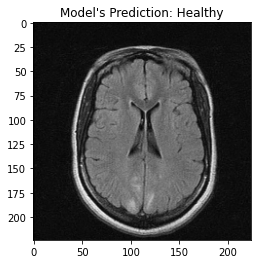

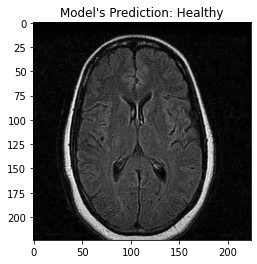

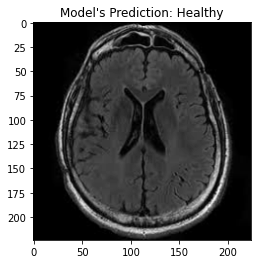

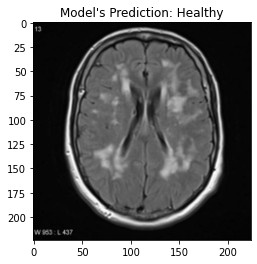

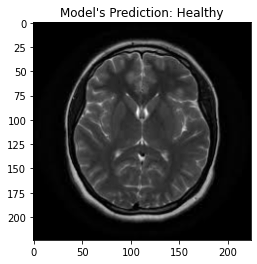

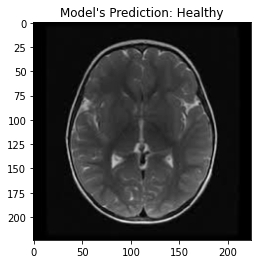

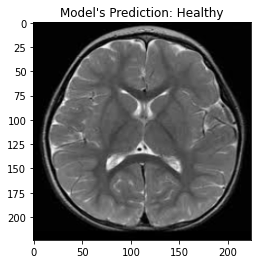

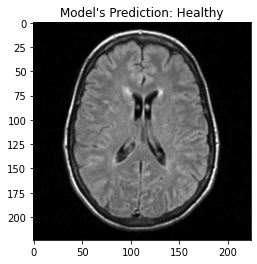

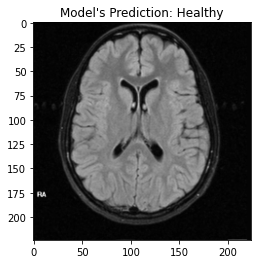

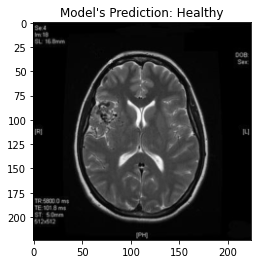

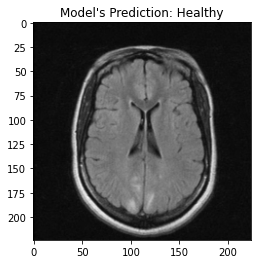

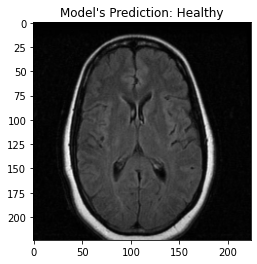

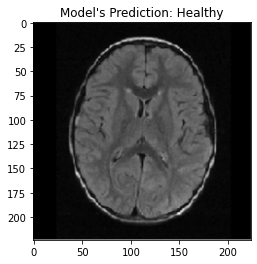

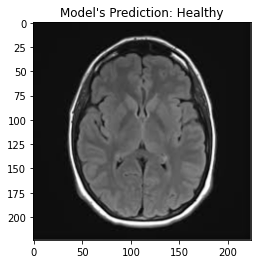

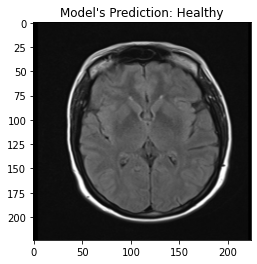

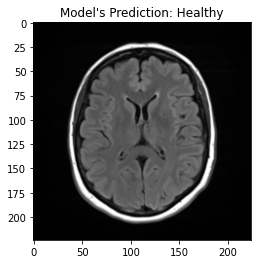

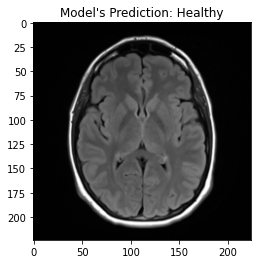

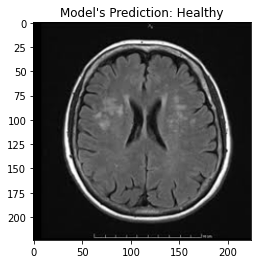

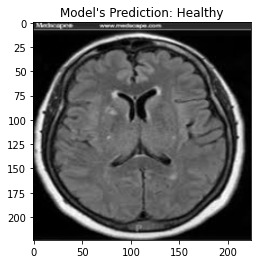

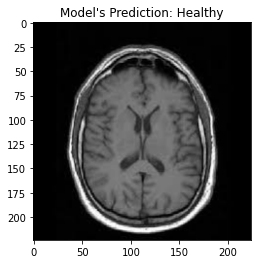

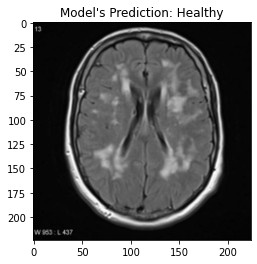

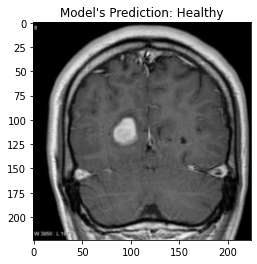

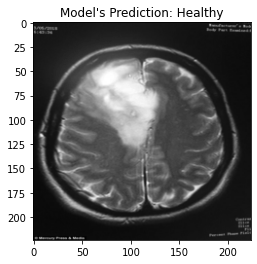

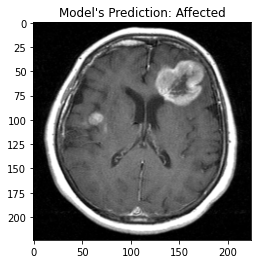

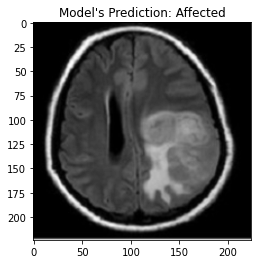

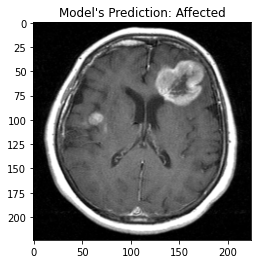

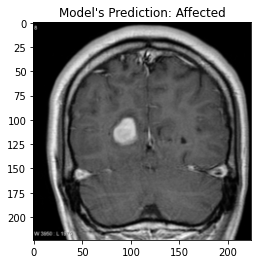

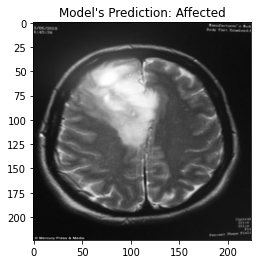

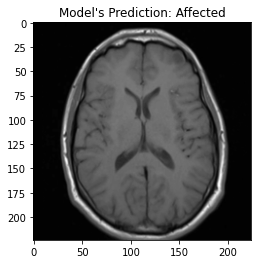

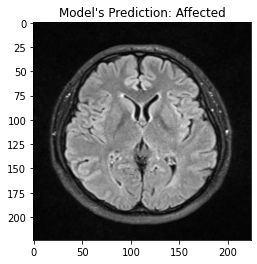

In [27]:
#Data Visualization Creation 
def pre_visualization(data, predictions):
    
    for image,pred in final_pred:
        plt.imshow(image.reshape(224,224), cmap = 'gray')
        plt.title("Model's Prediction: " + str(pred))
        plt.show()
        
pre_visualization(images107,prediction107)

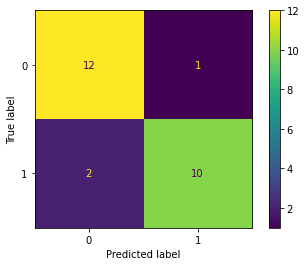

In [28]:
>>> import matplotlib.pyplot as plt  
>>> from sklearn.datasets import make_classification
>>> from sklearn.metrics import plot_confusion_matrix
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.svm import SVC
>>> X, y = make_classification(random_state=0)
>>> X_train, X_test, y_train, y_test = train_test_split(
...         X, y, random_state=0)
>>> clf = SVC(random_state=0)
>>> clf.fit(X_train, y_train)
SVC(random_state=0)
>>> plot_confusion_matrix(clf, X_test, y_test)  
>>> plt.show()  